In [289]:
import numpy as np
import matplotlib.pyplot as plt

In [290]:
def generate_data(n, epsilon=0.3, uniform_x = False):
  """
  Generates data following the rule: yᵢ = sin(2πxᵢ) + εZᵢ

  Args:
    n: The number of data points to generate.
    epsilon: The scaling factor for the noise.

  Returns:
    A tuple (X, y) where:
      X: A NumPy array of x values.
      y: A NumPy array of corresponding y values.
  """
  if uniform_x:
    X = np.linspace(0, 1, n)  # Generate n evenly spaced numbers between 0 and 1
  else:
    X = np.random.rand(n)  # Generate n random numbers between 0 and 1
  Z = 0.3*np.random.normal(0, 1, n)  # Generate n random numbers from standard normal distribution
  y = np.sin(2 * np.pi * X) + epsilon * Z  # Calculate y values according to the rule
  return X, y

# Example usage:
X, y = generate_data(10, uniform_x=True)  # Generate 100 data points

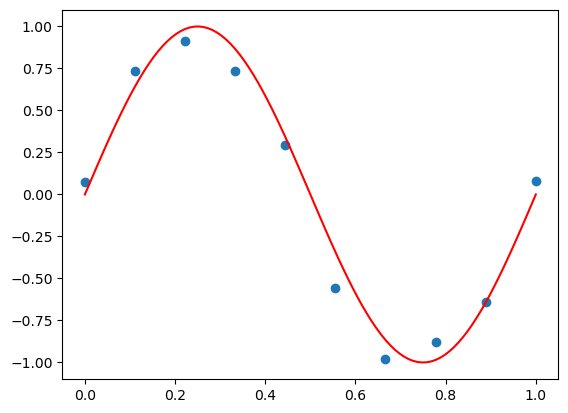

In [291]:
plt.plot(X, y, 'o')
complete_X = np.linspace(0, 1, 100)
plt.plot(complete_X, np.sin(2 * np.pi * complete_X), 'r')

In [292]:
X0 = np.ones((X.shape[0]))
X1 = np.vstack((X0, X)).T
X2 = np.vstack((X0, X, X**2)).T
X3 = np.vstack((X0, X, X**2, X**3)).T
print(X2)

[[1.         0.         0.        ]
 [1.         0.11111111 0.01234568]
 [1.         0.22222222 0.04938272]
 [1.         0.33333333 0.11111111]
 [1.         0.44444444 0.19753086]
 [1.         0.55555556 0.30864198]
 [1.         0.66666667 0.44444444]
 [1.         0.77777778 0.60493827]
 [1.         0.88888889 0.79012346]
 [1.         1.         1.        ]]


In [293]:
theta = np.linalg.inv(X3.T @ X3) @ X3.T @ y

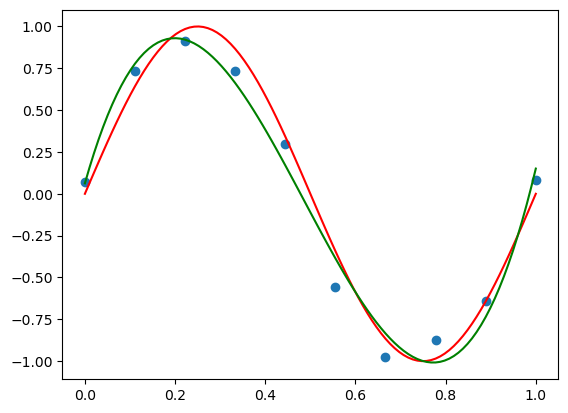

In [294]:
plt.plot(X, y, 'o')
plt.plot(complete_X, np.sin(2 * np.pi * complete_X), 'r')
plt.plot(complete_X, theta[0] + theta[1] * complete_X + theta[2] * complete_X**2 + theta[3] * complete_X**3, 'g')

In [295]:
lamb = 0.0001
theta_reg = np.linalg.inv(X3.T @ X3 + lamb*np.eye(X3.shape[1])) @ X3.T @ y

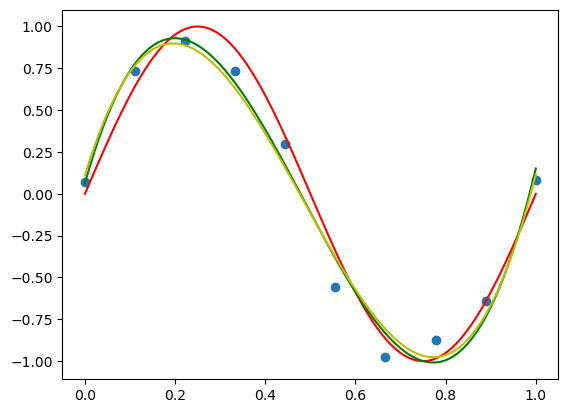

In [296]:
plt.plot(X, y, 'o')
plt.plot(complete_X, np.sin(2 * np.pi * complete_X), 'r')
plt.plot(complete_X, theta[0] + theta[1] * complete_X + theta[2] * complete_X**2 + theta[3] * complete_X**3, 'g')
plt.plot(complete_X, theta_reg[0] + theta_reg[1] * complete_X + theta_reg[2] * complete_X**2 + theta_reg[3] * complete_X**3, 'y')

In [297]:
import scipy.optimize as opt

In [298]:
X, y = generate_data(10, epsilon=0.3, uniform_x = True)
X_test, y_test = generate_data(10, epsilon=0.3, uniform_x = False)
X0 = np.ones((X.shape[0]))
X1 = np.vstack((X0, X)).T
X2 = np.vstack((X0, X, X**2)).T
X3 = np.vstack((X0, X, X**2, X**3)).T

X3_test = np.vstack((np.ones((X_test.shape[0])), X_test, X_test**2, X_test**3)).T

def loss(lamb):
    theta = np.linalg.inv(X3.T @ X3 + lamb*np.eye(X3.shape[1])) @ X3.T @ y
    return np.linalg.norm(X3 @ theta - y)

lamb = opt.minimize(loss, 0).x

[0.]


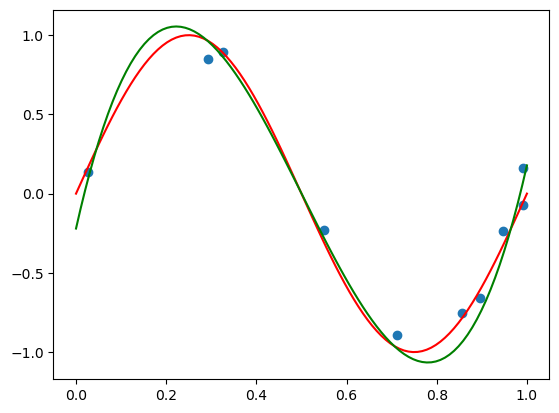

In [299]:
print(lamb)
theta_opt = np.linalg.inv(X3.T @ X3 + lamb*np.eye(X3.shape[1])) @ X3.T @ y
plt.plot(X_test, y_test, 'o')
plt.plot(complete_X, np.sin(2 * np.pi * complete_X), 'r')
plt.plot(complete_X, theta_opt[0] + theta_opt[1] * complete_X + theta_opt[2] * complete_X**2 + theta_opt[3] * complete_X**3, 'g')


In [300]:
def gen_X(n, X):
    X0 = np.ones((X.shape[0]))
    X = np.vstack((X0, X))

    for i in range(1, n):
        X = np.vstack((X, X[1,:]**(i+1)))
    return X.T

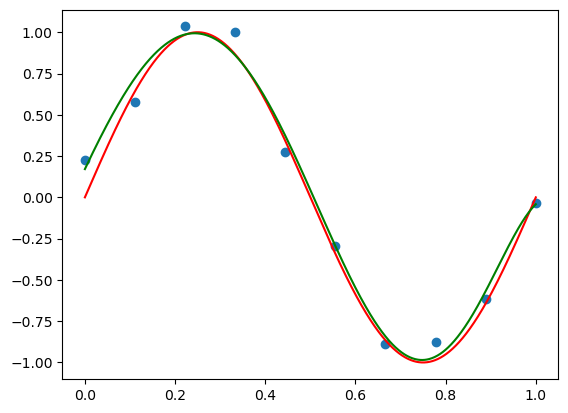

In [301]:
X, y = generate_data(10, epsilon=0.3, uniform_x = True)
X10 = gen_X(10, X)

X_test, y_test = generate_data(10, epsilon=0.3, uniform_x = False)
X10_test = gen_X(10, X_test)

complete_X = np.linspace(0, 1, 1000)
X10_complete = gen_X(10, complete_X)

lamb = 1e-5
theta_opt = np.linalg.inv(X10.T @ X10 + lamb*np.eye(X10.shape[1])) @ X10.T @ y
plt.plot(X, y, 'o')
plt.plot(complete_X, np.sin(2 * np.pi * complete_X), 'r')
plt.plot(complete_X, X10_complete@theta_opt, 'g')


# Calculating Lambda when polydeg = 9
This is just to show that our models look good and how I have chosen to validate the models

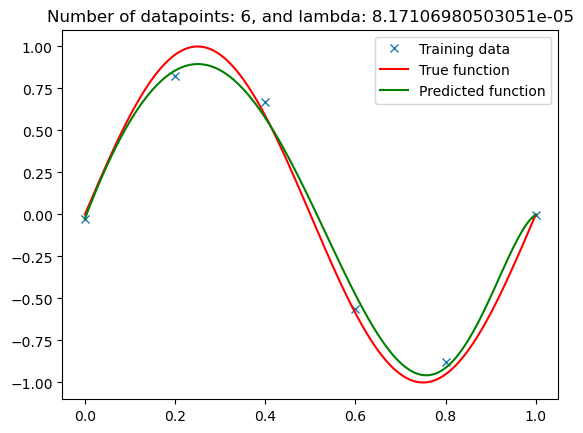

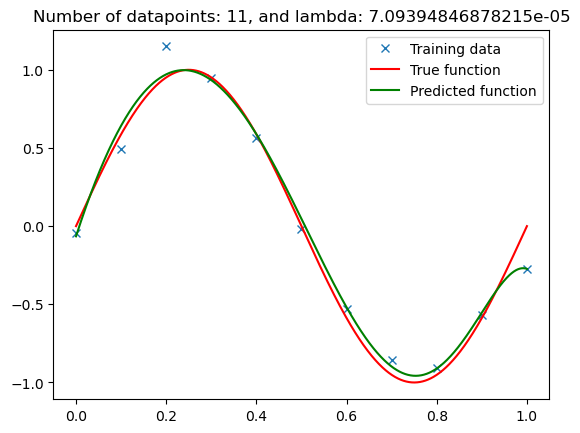

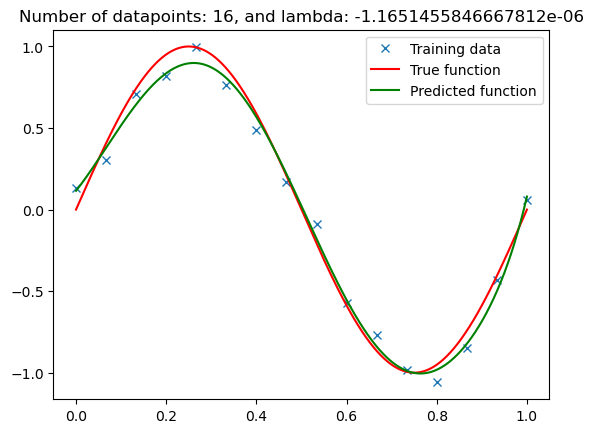

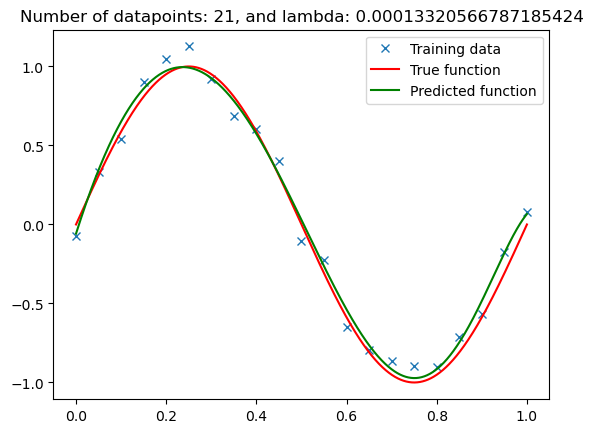

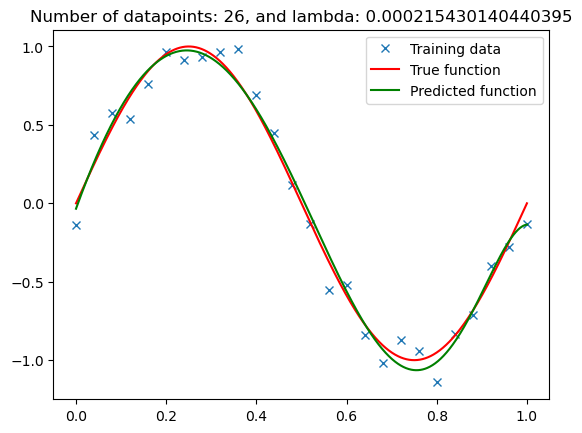

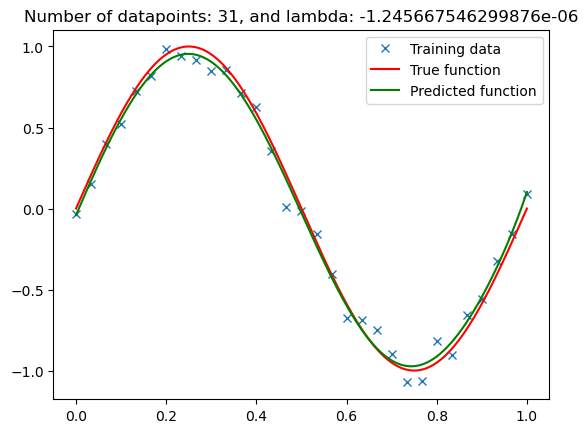

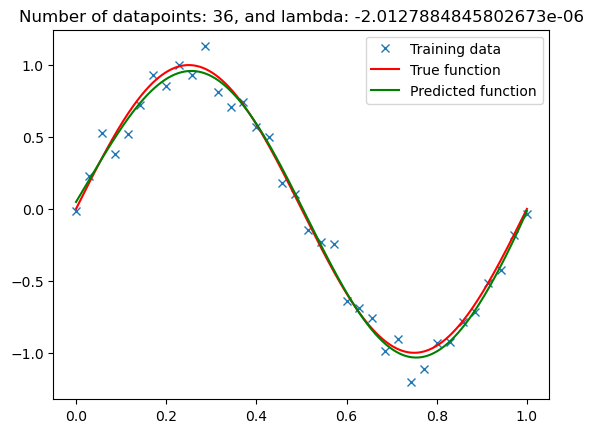

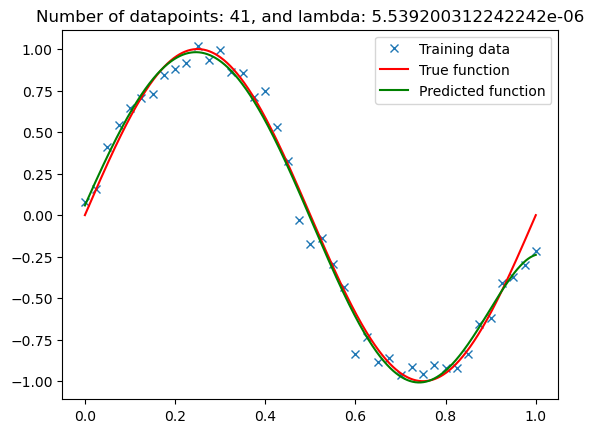

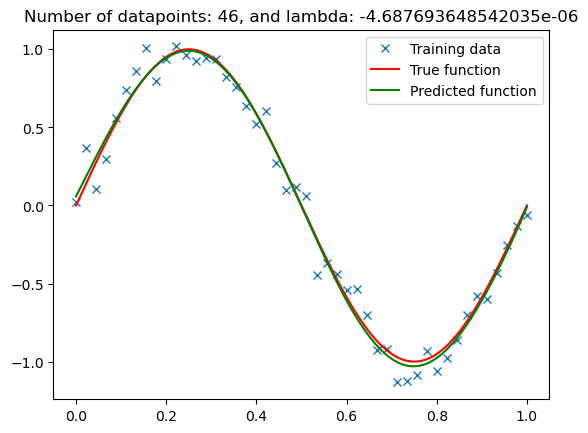

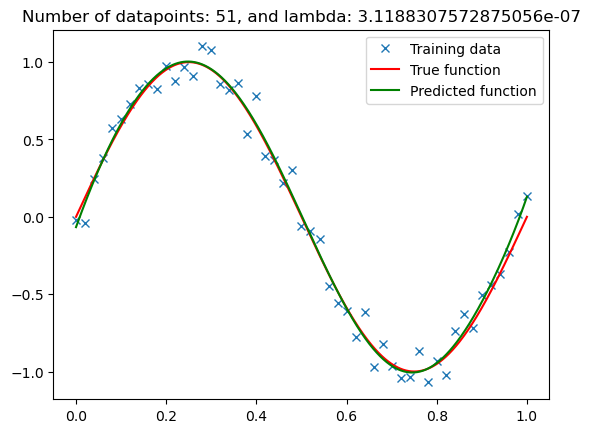

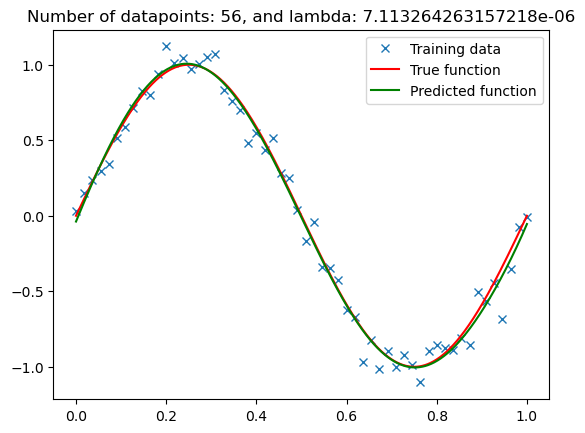

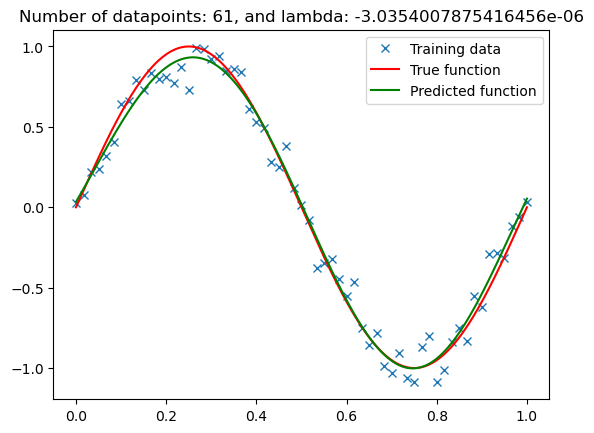

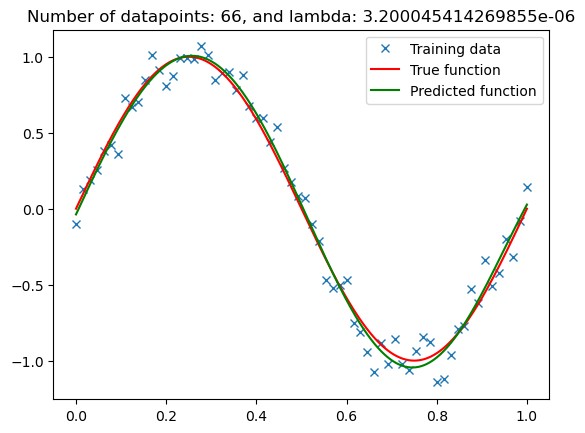

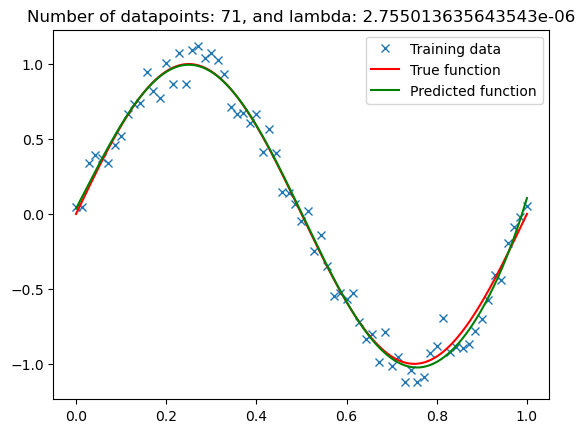

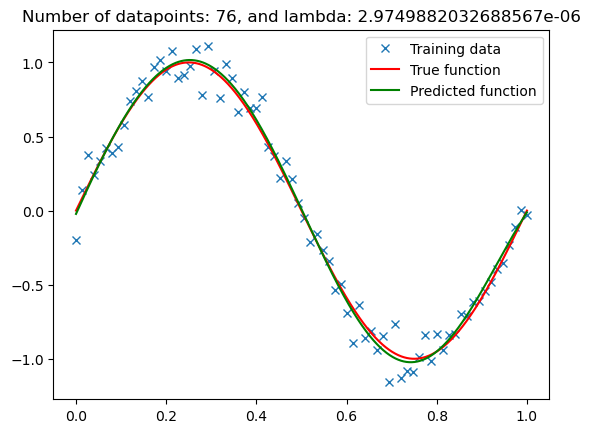

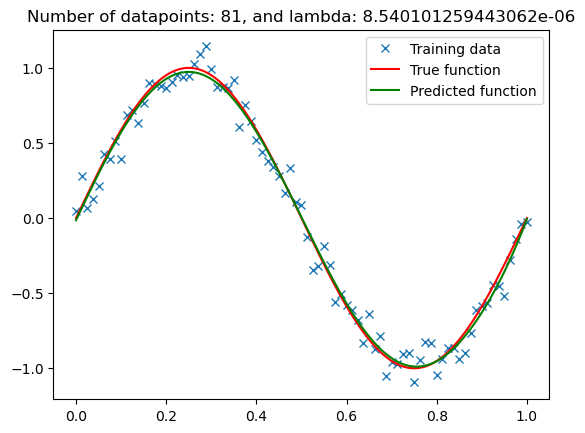

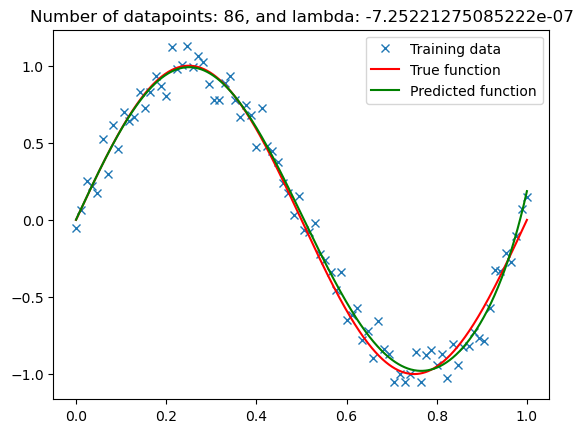

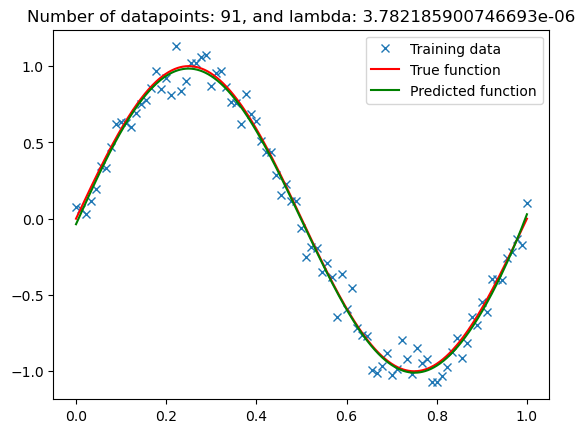

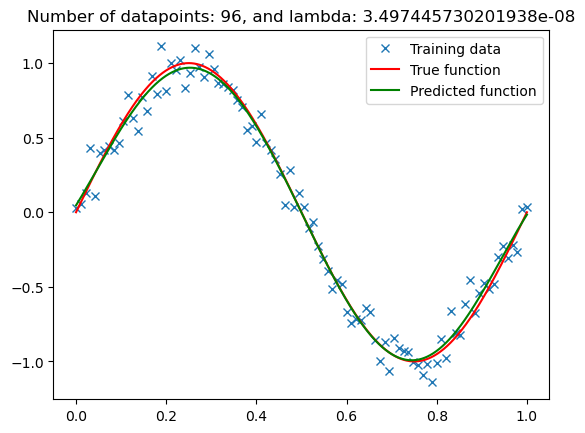

In [308]:
# either a lot more test dta or just test with the proper functiion

lambda_values = []
datapoints_list = []
L2_losses = []
poly_degree = 9

for datapoints in range(6, 100,5):
    X, y = generate_data(datapoints, epsilon=0.3, uniform_x = True)
    X_mat = gen_X(poly_degree, X)
    X_test, y_test = generate_data(10000, epsilon=0.3, uniform_x = True)
    X_mat_test = gen_X(poly_degree, X_test)

    complete_X = np.linspace(0, 1, 1000)
    X_mat_complete = gen_X(poly_degree, complete_X)


    def loss(lamb):
        theta = np.linalg.inv(X_mat.T @ X_mat + lamb*np.eye(X_mat.shape[1])) @ X_mat.T @ y
        return np.linalg.norm(X_mat_test @ theta - np.sin(2 * np.pi * X_mat_test[:,1]))
    

    lamb = opt.minimize(loss, 0).x[0]
    #lamb = 0#1e-5

    theta_opt = np.linalg.inv(X_mat.T @ X_mat + lamb*np.eye(X_mat.shape[1])) @ X_mat.T @ y

    lambda_values.append(lamb)
    datapoints_list.append(datapoints)
    L2_losses.append(np.linalg.norm(X_mat_test @ theta_opt - y_test)/datapoints)

    #plt.plot(X_test, y_test, 'o')
    plt.plot(X, y, 'x')
    plt.plot(complete_X, np.sin(2 * np.pi * complete_X), 'r')
    plt.plot(complete_X, X_mat_complete@theta_opt, 'g')
    plt.title(f"Number of datapoints: {datapoints}, and lambda: {lamb}")
    plt.legend(["Training data", "True function", "Predicted function"])
    plt.show()




# Showing lambda and losses from previous calculation

Length of datapoints_list: 19
Length of lambda_values: 19
Length of L2_losses: 19


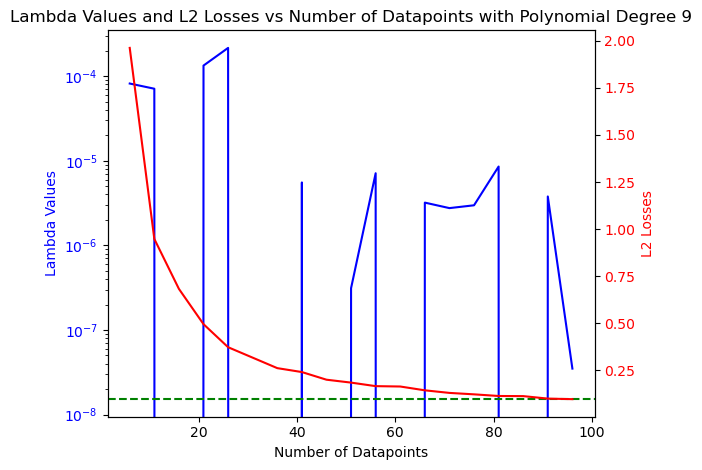

In [309]:
# Assuming datapoints_list, lambda_values, and L2_losses are defined
print("Length of datapoints_list:", len(datapoints_list))
print("Length of lambda_values:", len(lambda_values))
print("Length of L2_losses:", len(L2_losses))

# Ensure that datapoints_list and L2_losses have the same length
if len(datapoints_list) != len(L2_losses):
    raise ValueError("datapoints_list and L2_losses must have the same length")

fig, ax1 = plt.subplots()

# Plot the first set of data (lambda_values) on the primary y-axis with a logarithmic scale
ax1.semilogy(datapoints_list, lambda_values, 'b-', label='Lambda Values')
ax1.set_xlabel('Number of Datapoints')
ax1.set_ylabel('Lambda Values', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axhline(y=np.exp(-18), color='g', linestyle='--', label='y = e^-18')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(datapoints_list, L2_losses, 'r-', label='L2 Losses')
ax2.set_ylabel('L2 Losses', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and show the plot

plt.title(f'Lambda Values and L2 Losses vs Number of Datapoints with Polynomial Degree {poly_degree}')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [304]:
print(np.exp(-18))

1.522997974471263e-08


# Now we do the same calculation but with different degrees of polynomials

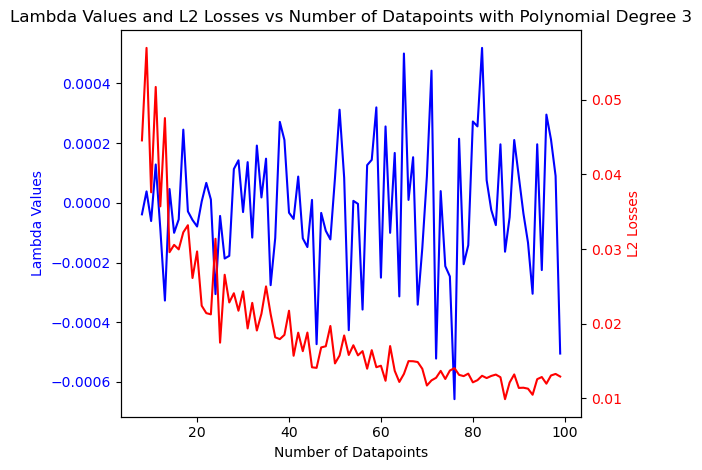

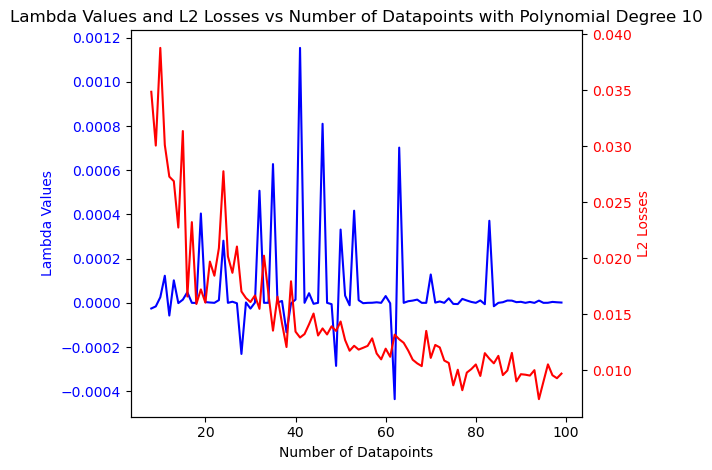

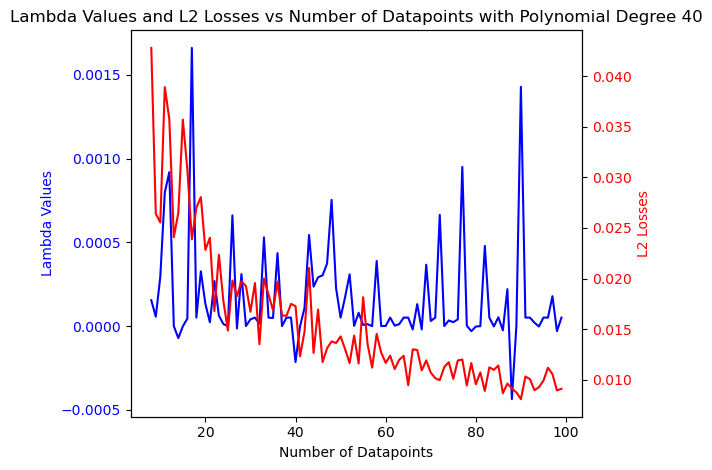

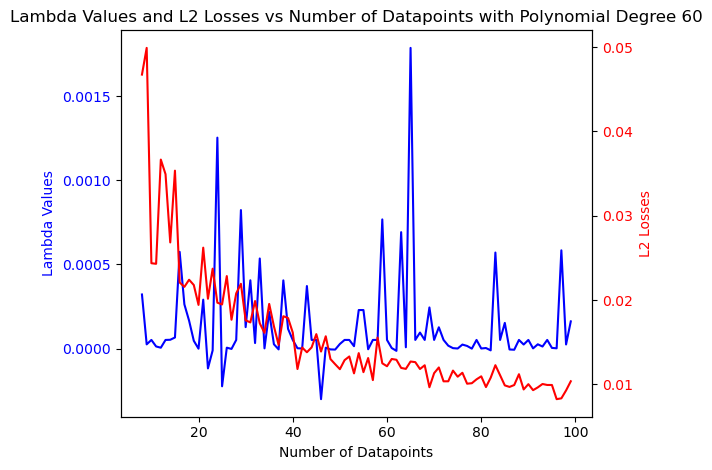

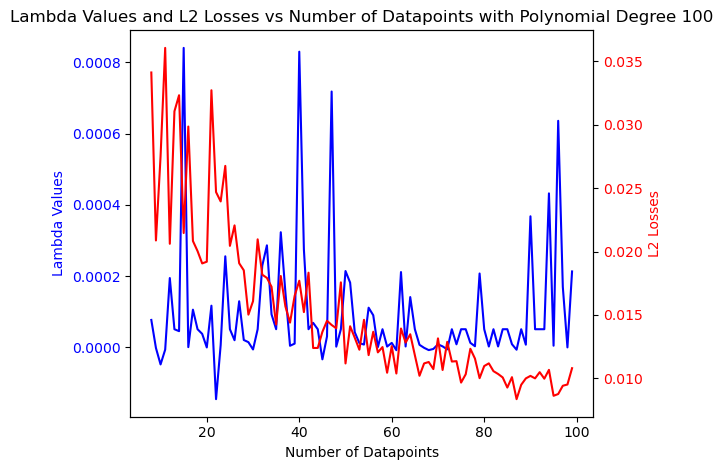

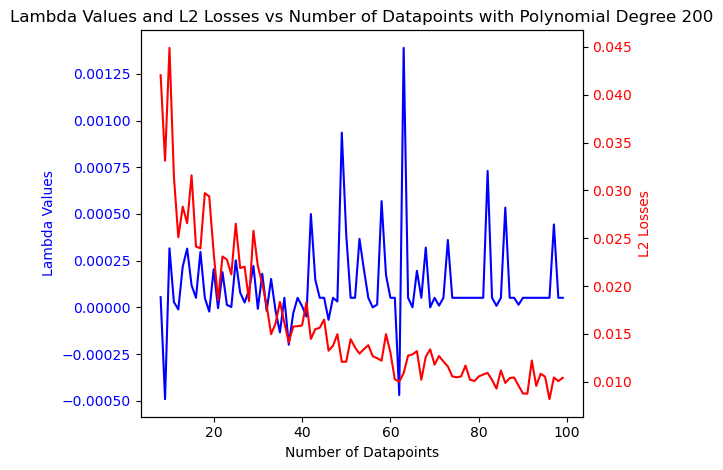

In [305]:
poly_degrees = [3,10,40,60,100,200]
for poly_degree in poly_degrees:
    lambda_values = []
    datapoints_list = []
    L2_losses = []

    for datapoints in range(8, 100,1):
        X, y = generate_data(datapoints, epsilon=0.3, uniform_x = True)
        X_mat = gen_X(poly_degree, X)
        X_test, y_test = generate_data(datapoints, epsilon=0.3, uniform_x = True)
        X_mat_test = gen_X(poly_degree, X_test)

        complete_X = np.linspace(0, 1, 1000)
        X_mat_complete = gen_X(poly_degree, complete_X)


        def loss(lamb):
            theta = np.linalg.inv(X_mat.T @ X_mat + lamb*np.eye(X_mat.shape[1])) @ X_mat.T @ y
            return np.linalg.norm(X_mat_test @ theta - y_test)
        

        lamb = opt.minimize(loss, 0).x[0]
        #lamb = 0#1e-5

        theta_opt = np.linalg.inv(X_mat.T @ X_mat + lamb*np.eye(X_mat.shape[1])) @ X_mat.T @ y

        lambda_values.append(lamb)
        datapoints_list.append(datapoints)
        L2_losses.append(np.linalg.norm(X_mat_test @ theta_opt - y_test)/datapoints)


    # Ensure that datapoints_list and L2_losses have the same length
    if len(datapoints_list) != len(L2_losses):
        raise ValueError("datapoints_list and L2_losses must have the same length")

    fig, ax1 = plt.subplots()

    # Plot the first set of data (lambda_values) on the primary y-axis with a logarithmic scale
    ax1.plot(datapoints_list, lambda_values, 'b-', label='Lambda Values')
    ax1.set_xlabel('Number of Datapoints')
    ax1.set_ylabel('Lambda Values', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(datapoints_list, L2_losses, 'r-', label='L2 Losses')
    ax2.set_ylabel('L2 Losses', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add a title and show the plot
    plt.title(f'Lambda Values and L2 Losses vs Number of Datapoints with Polynomial Degree {poly_degree}')
    fig.tight_layout()  # Adjust layout to prevent overlap
    plt.show()




# This time I tried to do a grid search for lambda instead of scipy optimize

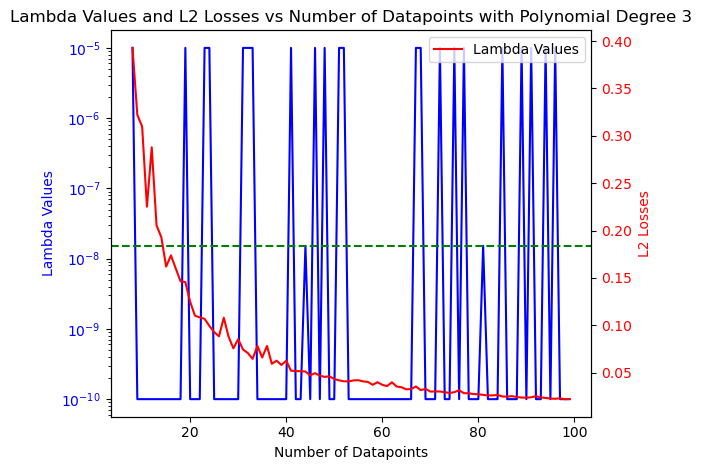

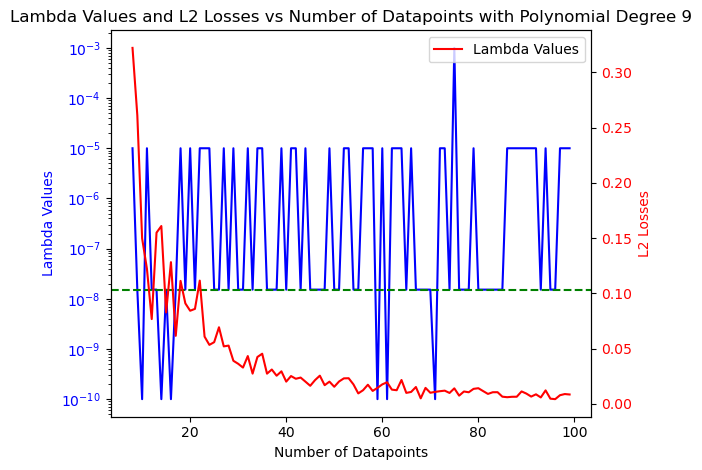

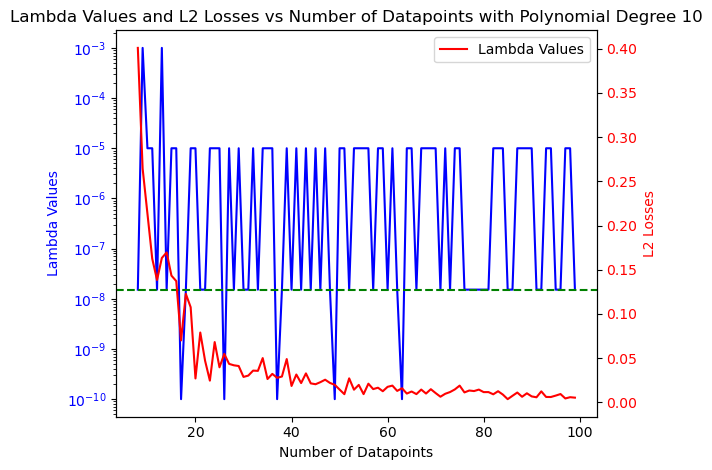

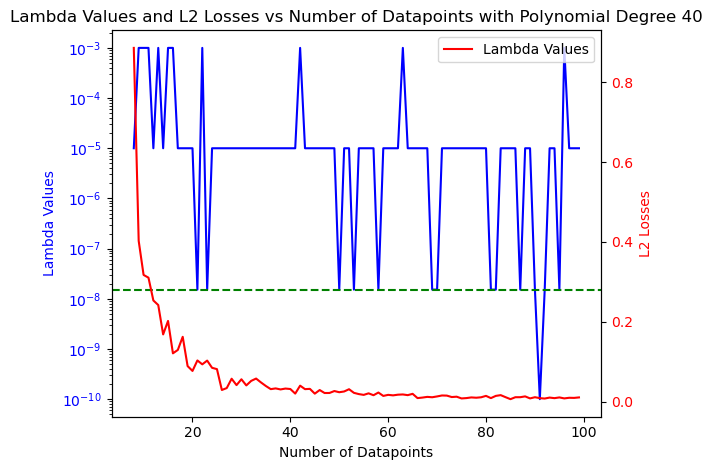

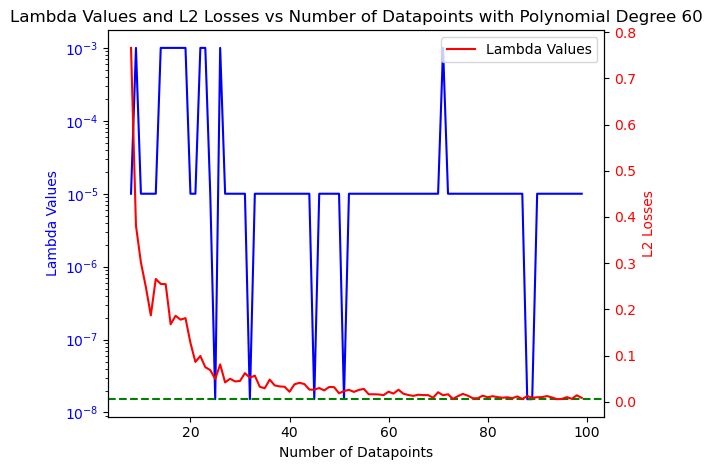

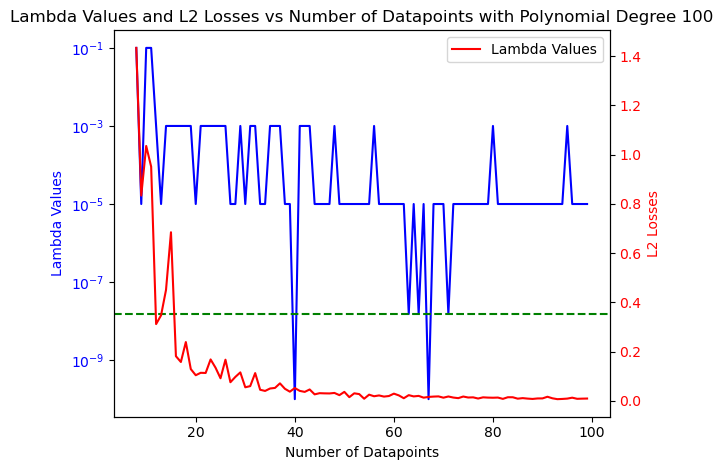

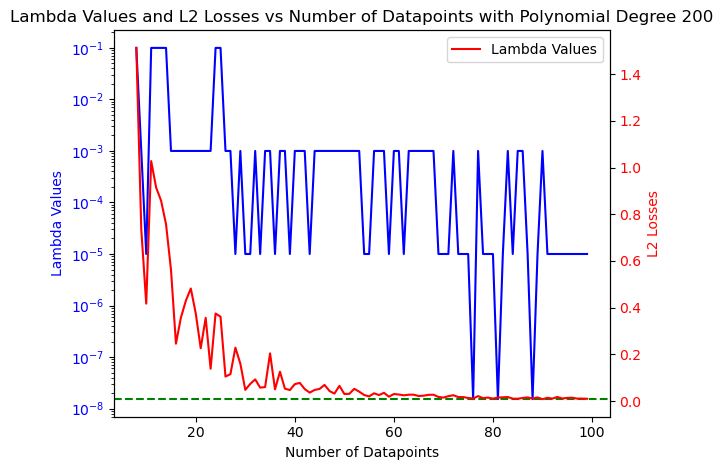

In [306]:
poly_degrees = [3,9,10,40,60,100,200]
lambs = [1e-10, np.exp(-18) ,1e-5,1e-3,1e-1,1,10]
for poly_degree in poly_degrees:
    lambda_values = []
    datapoints_list = []
    L2_losses = []

    for datapoints in range(8, 100,1):
        X, y = generate_data(datapoints, epsilon=0.3, uniform_x = True)
        X_mat = gen_X(poly_degree, X)
        X_test, y_test = generate_data(1000, epsilon=0.3, uniform_x = True)
        X_mat_test = gen_X(poly_degree, X_test)

        complete_X = np.linspace(0, 1, 1000)
        X_mat_complete = gen_X(poly_degree, complete_X)
        
        best_lamb = 0
        best_loss = np.inf
        for lamb in lambs:
            theta = np.linalg.inv(X_mat.T @ X_mat + lamb*np.eye(X_mat.shape[1])) @ X_mat.T @ y
            l_loss = np.linalg.norm(X_mat_test @ theta - np.sin(2 * np.pi * X_mat_test[:,1]))
            if l_loss < best_loss:
                best_loss = l_loss
                best_lamb = lamb
            
        #lamb = 0#1e-5

        theta_opt = np.linalg.inv(X_mat.T @ X_mat + best_lamb*np.eye(X_mat.shape[1])) @ X_mat.T @ y

        lambda_values.append(best_lamb)
        datapoints_list.append(datapoints)
        L2_losses.append(np.linalg.norm(X_mat_test @ theta_opt - np.sin(2 * np.pi * X_mat_test[:,1]))/datapoints)


    # Ensure that datapoints_list and L2_losses have the same length
    if len(datapoints_list) != len(L2_losses):
        raise ValueError("datapoints_list and L2_losses must have the same length")

    fig, ax1 = plt.subplots()

    # Plot the first set of data (lambda_values) on the primary y-axis with a logarithmic scale
    ax1.semilogy(datapoints_list, lambda_values, 'b-', label='Lambda Values')
    ax1.set_xlabel('Number of Datapoints')
    ax1.set_ylabel('Lambda Values', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.axhline(y=np.exp(-18), color='g', linestyle='--', label='y = e^-18')

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(datapoints_list, L2_losses, 'r-', label='L2 Losses')
    ax2.set_ylabel('L2 Losses', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add a title and show the plot
    plt.title(f'Lambda Values and L2 Losses vs Number of Datapoints with Polynomial Degree {poly_degree}')
    plt.legend(["Lambda Values", "L2 Losses",])
    fig.tight_layout()  # Adjust layout to prevent overlap
    plt.show()




Man måste tvinga den att göra en chelesky solve med scipys metod inte numpy

mathematically it does not kick in untill big

do cross validation on the computer?

kolla på bishop och lecture notes 1 där de säger att han använder M=9